Voici le notebook sur lequel nous allons expliquer la démarche derrière l'édition d'images. 
En reprenant les notations du document -- http://eul.ink/complex-analysis/Poisson%20Image%20Editing/ -- nous cherchons à résoudre:
$$\begin{align*}
\Delta \psi &= \Delta \phi \; sur \; D\\
\psi_{|\partial{D}} &= \phi_{|\partial{D}}
\end{align*}
$$
Discrétisons les fonctions proposées. On crée une grille avec $N = m*n$ points pour répresenter $D \in \mathbf{R}^2 $.
Soient $\{x_i, x_j, i \in [1,m], j \in [1,n]\}$ décrivant cette grille, avec les pas $ h_x = x_{i+1} - x_i $, et  $ h_y = x_{j+1} - x_j $. Notons $h = max(h_x,h_y)$
Puis on pose:
$$
u = 
\begin{pmatrix}
\psi_{1,1}\\
\psi_{1,2}\\
\vdots\\
\psi_{1,m}\\
\psi_{2,1}\\
\psi_{2,2}\\
\vdots\\
\psi_{2,m}\\
\vdots\\
\psi_{n,1}\\
\vdots\\
\psi_{n,m}\\
\end{pmatrix} \in \mathbf{R}^{N}
$$
u est le vecteur que l'on cherche à déterminer
On pose de la même manière:
$$t = 
\begin{pmatrix}
\phi_{1,1}\\
\phi_{1,2}\\
\vdots\\
\phi_{1,m}\\
\phi_{2,1}\\
\phi_{2,2}\\
\vdots\\
\phi_{2,m}\\
\vdots\\
\phi_{n,1}\\
\vdots\\
\phi_{n,m}\\
\end{pmatrix} \in \mathbf{R}^{N}
$$
Enfin, on explicite l'opérateur Laplacien: 
Lorsque la discrétisation est assez fine, pour une fonction deux fois différentiable u, 
$$\begin{align}
\Delta \psi(x_i,x_j) &= \frac{\partial^2 \psi}{\partial x^2}(x_i,x_j)+\frac{\partial^2 \psi}{\partial y^2}(x_i,x_j)
\end{align}
$$
Or, pour une fonction f quelconque, on a les approximations suivantes

$$\begin{align*}
f(x_{i+1}) &= f(x_{i}) + f'(x_{i})h + f''(x_i)\frac{h^2}{2} + O(h^4) \\
f(x_{i-1}) &= f(x_{i}) - f'(x_{i})h + f''(x_i)\frac{h^2}{2} + O(h^4) \\
\end{align*}
$$
Ie: 
$$\begin{align*}
f(x_{i+1}) + f(x_{i-1}) &= 2f(x_{i}) +  f''(x_i)h^2 + O(h^2) \\
\frac{f(x_{i+1}) + f(x_{i-1}) - 2f(x_{i}) }{h^2} &= f''(x_i) + O(h^2)\\
\end{align*}
$$
Puis enfin, en 2D, pour la fonction Psi par exemple: 
$$\begin{align*}
\frac{\psi(x_{i+1,j}) + \psi(x_{i-1,j})+\psi(x_{i,j+1}) + \psi(x_{i,j-1}) - 4\psi(x_{i,j})}{h^2} &= \Delta \psi(x_{i,j}) + O(h^2)\\
\end{align*}
$$
On va donc résoudre, en pratique 
$$\begin{align*}
A \mathbf{u} &= A \mathbf{t} \; sur \; D\\
\mathbf{u}_{|\partial{D}} &= \mathbf{t}_{|\partial{D}}
\end{align*}
$$
A est l'opérateur laplacien: 
$$ 
A = 
\begin{pmatrix}
-4 & 1 & & & &  1 & & & & & & & & &  & & & & & \\
1 & -4 & 1  & & &  & 1 & & & &  & & & &  &  & & & & \\
 &\ddots & \ddots & & &  &  &\ddots & & &  &  & & &  &  & & & & \\
 & & 1 & -4 & &  &  & & 1  & &  &  & & &  &  & & & & \\
1&  & & & &  -4 & 1 & & & & 1 & & & &  & & & & & \\
 & 1 & & & &  1 & -4 & 1 & & &  & 1 & & &  & & & & & \\
 &  & \ddots & & &   & \ddots & \ddots & & &  &  &\ddots & &  & & & & & \\
 &  &  & 1 & &   &  & 1 & -4& &  &  & & 1 &  & & & & & \\
  &  &  &  & &   &  &  & \ddots& &  &  & &  &  & & & & & \\
   &  &  &  & &   &  &  & & \ddots &  &  & &  &  & & & & & \\
\end{pmatrix} \in \mathbf{R}^{N*N}
$$
Notons 
$$ 
D = 
\begin{pmatrix}
-4 & 1 & & & &\\
1 & -4 & 1 & & &\\
 & \ddots & \ddots & \ddots& &\\
  & & \ddots & \ddots&  1 & \\
    & & & 1 &  -4 & \\
\end{pmatrix} \in \mathbf{R}^{m*m}
$$
Et notons
$$ 
I = 
\begin{pmatrix}
1 & & & &\\
& 1 &  & &\\
 & & \ddots &\\
 & & &  1\\
\end{pmatrix} \in \mathbf{R}^{m*m}
$$
Alors A est une matrice par blocs, composée par les blocs $D$ et $I$: 
$$ 
A = \begin{pmatrix}
D & I& & & &  I & & & & & & & & &  & & & & & \\
I & D & I & & &  & I & & & &  & & & &  &  & & & & \\
 &\ddots & \ddots & & &  &  &\ddots & & &  &  & & &  &  & & & & \\
 & & I & D & &  &  & & I  & &  &  & & &  &  & & & & \\
I&  & & & &  D & I & & & & I & & & &  & & & & & \\
 & I & & & &  I & D & I & & &  & I & & &  & & & & & \\
 &  & \ddots & & &   & \ddots & \ddots & & &  &  &\ddots & &  & & & & & \\
 &  &  & I & &   &  & I & D & &  &  & & I &  & & & & & \\
  &  &  &  & &   &  &  & \ddots& &  &  & &  &  & & & & & \\
   &  &  &  & &   &  &  & & \ddots &  &  & &  &  & & & & & \\
\end{pmatrix}\in \mathbf{R}^{N*N}
$$
Il faut maintenant prendre en compte la contrainte sur les bords
$$\psi_{|\partial{D}} = \phi_{|\partial{D}} $$
Pour tout indice d'ordre lexicographique $ k = i*m + j $ désignant un point $u_k = \psi_{x_i,x_j} $ tel que $u_k \in \partial{D}$, on va imposer la contrainte:
$$ \begin{align*}
\forall l \;!= \;j,\; a_{i*m+l} &= 0 \\
a_{k} = 1
\end{align*}
$$
Ceci empêche la matrice d'être symétrique puisqu'elle ressemble alors à:
$$A = \begin{pmatrix}
I &   & & & &\\
I' &D'& I' & & &\\
 & \ddots & \ddots & \ddots& &\\
  & & \ddots & \ddots&  I' & \\
    & & &  &  I & \\
\end{pmatrix} \in \mathbf{R}^{N*N}
$$
Si elle n'est pas inversible, nous pourrons toujours ajouter les termes qui manquent pour la rendre symétrique, et éventuellement ajouter un facteur à la matrice identité pour imposer la contrainte

TO DO:
* make mask function
* make laplacian function
*


from PIL import image
import numpy as np

In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level = logging.INFO, format = "%(threadName)s - %(message)s")
import scipy.sparse as sc
from scipy.sparse.linalg import spsolve


In [35]:

def convert_image_2Dgrey_not_3D(img):
   """Takes an image url (in 3D because RGB values), and returns the corresponding 2D grey image"""
   if type(img) == np.ndarray and img.ndim == 2:
      return img
   if type(img) == np.ndarray and img.ndim == 3:
      return img.mean(axis = 2)
   im2 = np.array(img.getdata())
   im2[:] = im2.mean(axis = 1).reshape((-1,1))
   im2 = im2.reshape((img.height, img.width, 3))
   return im2.mean(axis =  2)
#make_image_2D_not_3D("image/objects.jpeg")

def convert_image_to_array3D(img:Image.Image):
   return np.array(img.getdata()).reshape((img.height,img.width,3))

def convert_array_2D_to_3D(A:np.ndarray):
   arr = np.empty(shape = (*A.shape,3))
   arr[::,::] = A.reshape((*A.shape,1))
   return arr

def rgb2gray(rgb):
   if(type(rgb) != np.ndarray):
      rgb = convert_image_to_array3D(rgb)
   return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
def show_image(img):
   plt.imshow(np.array(img.getdata()).reshape((img.height,img.width,3)))


In [36]:

def lapA(m:int ,n:int):
   """Create laplacian operator matrix, without the boundary condition using SPARSE_MATRIX
   Args:
   m : int - height in pixels of D domain
   n : int - width in pixels of D domain"""
   D = sc.lil_matrix((m,m))
   D.setdiag(-4)
   D.setdiag(1,1)
   D.setdiag(1,-1)
   I = sc.lil_matrix((m,m))
   I.setdiag(1)
   A = sc.lil_matrix((m*n,m*n))
   for k in range(n):
      A[k*m: k*m+m, k*m: k*m+m] = D
   for k in range(n-1):
      A[k*m:k*m+m,k*m+m:k*m+2*m] = I
   for k in range(n-1):
      A[k*m+m:k*m+2*m,k*m:k*m+m] = I
   return A

def make_mask(m,n):
   #The mask m will have the same shape as source, (and cropped target) ie D
   #The mask m has a rectangular of 1s, inside a boundary of 0s
   mask = np.ones(shape = (m,n))
   for k in range(10):
      mask[k] = 0
      mask[-(k+1)] = 0
      mask[:, k] = 0
      mask[:, -(k+1)] = 0

   return mask.flatten()

def lapAfinal(m,n):
   mask = make_mask(m,n)
   print(f"mask.shape =  {mask.shape}")
   A = lapA(m,n)
   print(f"A shape = {A.get_shape()}")

   A[mask == 0] = 0
   A[mask==0, mask==0] = 1
   return A.tocsc()

def make_b(m,n,source, target):
   mask = make_mask(m,n)
   print(f"mask shape in make_b {mask.shape}")
   assert(type(source) == np.ndarray and source.ndim <= 2)
   assert(type(target) == np.ndarray and target.ndim <= 2)
   if source.ndim == 2:
      source = source.flatten()
   A = lapAfinal(m,n) #csc matrix
   

   
   logging.info("Calculating A @ source")
   b =A.dot(source)
   b[mask==0] = target[mask==0]
   return b


mask.shape =  (7200,)
A shape = (7200, 7200)
mask shape in make_b (7200,)
mask.shape =  (7200,)
A shape = (7200, 7200)


MainThread - Calculating A @ source


mask.shape =  (7200,)
A shape = (7200, 7200)
mask shape in make_b (7200,)
mask.shape =  (7200,)
A shape = (7200, 7200)


MainThread - Calculating A @ source


mask.shape =  (7200,)
A shape = (7200, 7200)
mask shape in make_b (7200,)
mask.shape =  (7200,)
A shape = (7200, 7200)


MainThread - Calculating A @ source


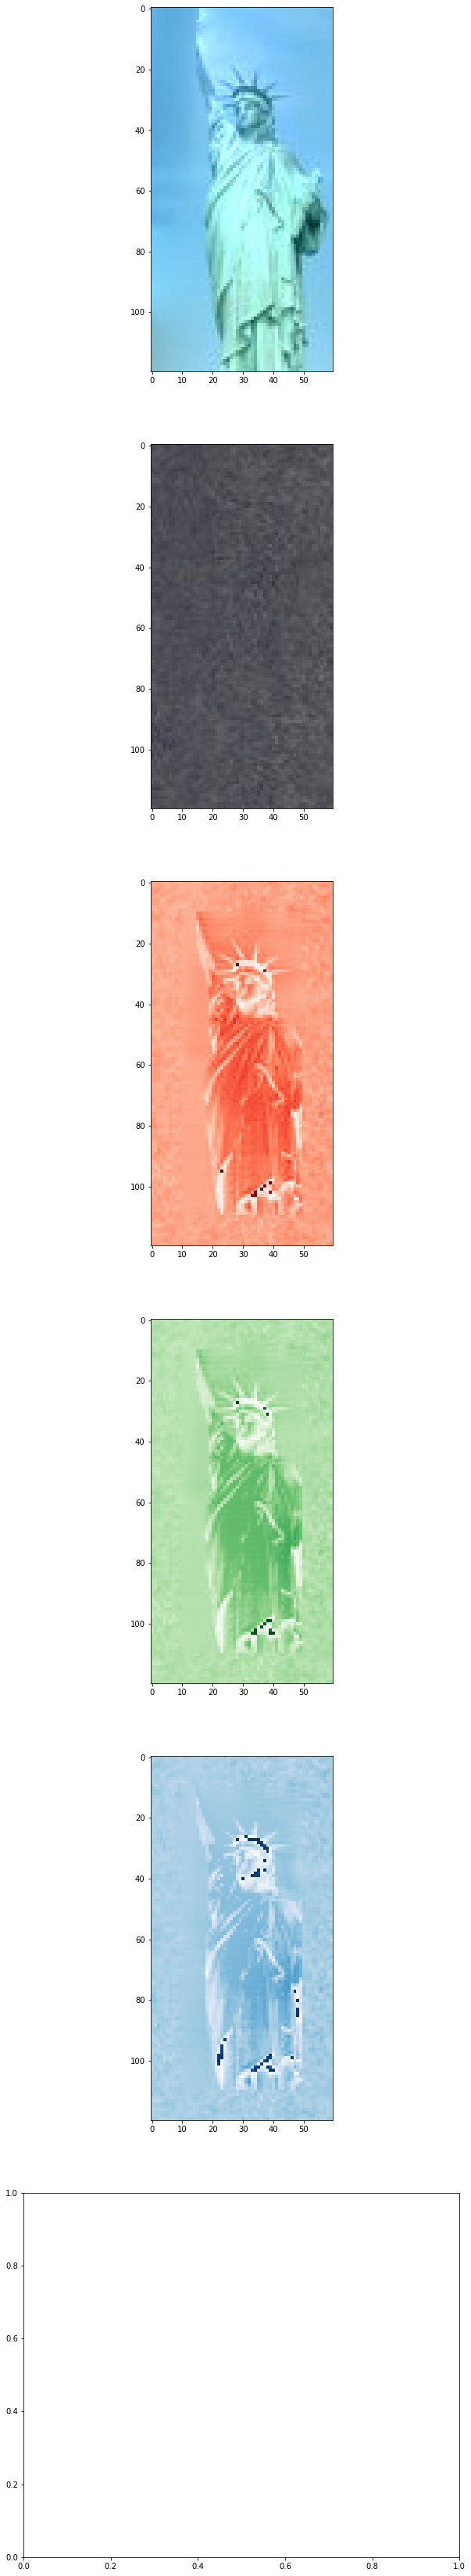

In [38]:

def solve():
   """source = Image.open("images/objects.jpeg")
   source_y,source_x = 1400,1600
   source_width, source_height = 50,200
   source = source.crop((source_x,source_y,source_x+source_width, source_y+source_height)) """
   source = Image.open('figs/possion1.png')
   source = source.crop((270,180,330,300))
   source = np.asarray(source)
   m,n = source.shape[:2]
   
   source_dict = {'Reds':source[::,::,0], 'Greens' :source[::,::,1],'Blues': source[::,::,2] }
   
   #make target rectangle of the same size as source
   target = Image.open("images/objects-final.jpeg")
   target_x,target_y =  1000,600
   target = target.crop((target_x,target_y, target_x+n, target_y+m))
   target=np.asarray(target)
   target_dict = {'Reds':target[::,::,0], 'Greens' :target[::,::,1],'Blues': target[::,::,2] }

   #testing with just the grey version #[0.2989, 0.5870, 0.1140]
   """
   source_grey = rgb2gray(source)
   target_grey = rgb2gray(target)
   assert(source_grey.ndim == 2 )

   

   source_grey = source_grey.flatten()
   target_grey = target_grey.flatten()

   A = lapAfinal(m,n)
   b = make_b(m,n,source_grey,target_grey)
   u = np.linalg.solve(A,b)*255
   u = u.reshape((m,n)).astype('uint8')
   u[u<0] = 0
   u[u>255] = 255
   fig, axes = plt.subplots(3, figsize = (10,30))
   axes[0].imshow(u, cmap = 'gray', vmin = 0, vmax = 255) """

   #testing with all three versions 
   fig, axes = plt.subplots(6, figsize = (10,60))
   #the first two plots are source then target
   axes[0].imshow(source)
   axes[1].imshow(target)
   final_arr = np.empty(shape = (m,n,3))
   for i,c in enumerate(source_dict.keys()):
      source = source_dict[c]
      target = target_dict[c]
      assert(source.ndim == 2 )
      source = source.flatten()
      target = target.flatten() 

      A = lapAfinal(m,n) 
      b = make_b(m,n,source,target)
      u = sc.linalg.spsolve(A,b)
      u = u.reshape((m,n)).astype('uint8')
      """u[u<0] = 0
      u[u>255] = 255 """
      axes[i+2].imshow(u, cmap = c, vmin = 0, vmax = 255)
      final_arr[::,::,i] = u
      final_arr = final_arr.astype('uint8')
   

   


   final_img = Image.fromarray(final_arr)
   target2 = Image.open("images/objects-final.jpeg")
   target2.paste(final_img,(target_x,target_y))
   target2.show()



   #merging them together 

solve()  